# Домашняя работа

Работаем с отзывами на авиа-компанию:

https://www.kaggle.com/datasets/kanchana1990/singapore-airlines-reviews/data

## Easy

Выбрать метрику.

Удалить пунктуацию из датасета.

Преобразовать датасет в BOW или TF-IDF, поделить на треин-тест и спрогнозировать вашей любимой моделью

In [1]:
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('../data/singapore_airlines_reviews.csv')
df.head(3)

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0


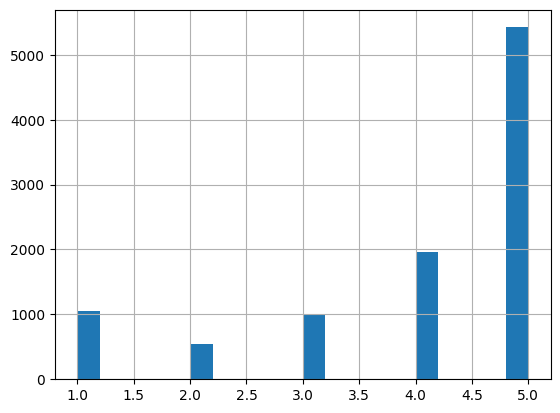

In [3]:
df.rating.hist(bins=20); # почти все отзывы хорошие

In [4]:
df.helpful_votes.value_counts()[:10]

helpful_votes
1    3493
0    3091
2    2481
3     564
4     190
5      77
6      38
7      17
8      10
9       8
Name: count, dtype: int64

In [5]:
df.published_platform.unique()

array(['Desktop', 'Mobile'], dtype=object)

In [6]:
df.type.unique() # самый полезный признак

array(['review'], dtype=object)

In [7]:
df.drop('type', axis=1, inplace=True)

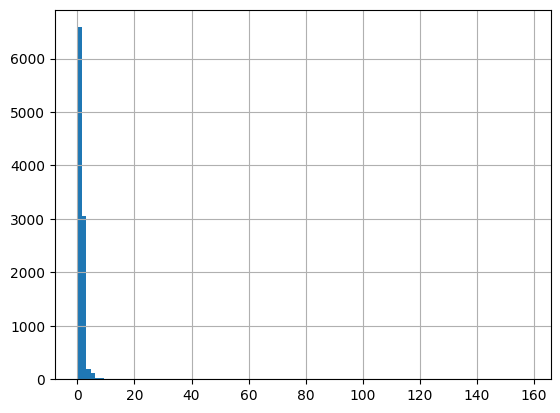

In [8]:
df['helpful_votes'].hist(bins=100);

In [9]:
def rm_punc(text):
    text = str(text)
    for el in string.punctuation:
        text = text.replace(el, '')
    return text.lower()

In [10]:
df['text'] = df['text'].apply(rm_punc)

In [11]:
df['title'] = df['title'].apply(rm_punc)

In [12]:
df['title_text'] = df['title'] + ' '  + df['text']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df['title_text'], df['rating'], test_size=0.2, random_state=42)

In [14]:
vectorizer = CountVectorizer()

In [15]:
x_train = vectorizer.fit_transform(x_train)

In [16]:
x_test = vectorizer.transform(x_test)

In [17]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [18]:
y_pred = model.predict(x_test)

In [19]:
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.6325557263679298


## Normal

Удалить стоп-слова, применить стемминг/лемматизацию. Обучить несколько моделей, подобрать параметры, сделать выводы.

Написать самостоятельно два отзыва - один положительный, один негативный, посмотреть, угадает ли модель.

In [20]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bentodan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bentodan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
stop_words = set(stopwords.words('english'))

In [22]:
df['clean'] = df['title_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [23]:
df[['clean', 'title_text']].sample(3)

,clean,title_text
1248,far best service ive received since covid trul...,by far best service ive received since covid i...
786,great service flight attendant sq222 20th sept...,great service the flight attendant on sq222 20...
4521,pleasant trip flight one flight attendant sect...,not a pleasant trip for a flight such as this ...


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.stem import WordNetLemmatizer

In [25]:
morph = WordNetLemmatizer()

def get(word):
    return morph.lemmatize(word)

In [26]:
get('dogs'), get('abracadabra'), get('women')

('dog', 'abracadabra', 'woman')

In [27]:
def func(text):
    return " ".join([get(word) for word in text.split()])

In [28]:
df.clean = df.clean.apply(func)

In [29]:
X = df['clean']
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [31]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}


In [ ]:
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}\nAccuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print()

Model: Logistic Regression
Accuracy: 0.6785
              precision    recall  f1-score   support

           1       0.65      0.74      0.69       206
           2       0.35      0.05      0.09       110
           3       0.52      0.36      0.43       211
           4       0.49      0.33      0.39       397
           5       0.74      0.92      0.82      1076

    accuracy                           0.68      2000
   macro avg       0.55      0.48      0.49      2000
weighted avg       0.64      0.68      0.64      2000


Model: Support Vector Machine
Accuracy: 0.6815
              precision    recall  f1-score   support

           1       0.67      0.74      0.71       206
           2       0.33      0.02      0.03       110
           3       0.50      0.37      0.43       211
           4       0.51      0.25      0.34       397
           5       0.73      0.96      0.83      1076

    accuracy                           0.68      2000
   macro avg       0.55      0.47      

C:\Users\bentodan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bentodan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bentodan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

как видим, все модельки на общем уровне. правда, я не подбирал параметры, но мне лень.

In [ ]:
positive = "lovely company, calmly escaped this owful snowy winter right to my favorite white beaches"
negative = "for sure, it's a great company, the best, i'd say. I just LOVE travelling with it, especially when they cancel the flight ONE HOUR before departure"

In [ ]:
def pred(texts, name="Logistic Regression"):
    for text in texts:
        text = [text] # vectorizer specific
        text_tok = tfidf_vectorizer.transform(text)
        print(models[name].predict(text_tok)[0], text[0], sep="\n", end = "\n=====\n")

In [ ]:
pred([positive, negative]) # ну, как видно, мы обманули нашу "умную" модельку, почти hard:)

In [ ]:
pred(["just terrible, won't recommend"]) # несколько раз до этого здесь предсказывали 5 :) 